In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


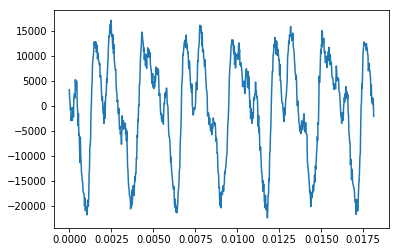

In [8]:
plt.plot(t,y)

In [10]:
freq = 55*2**(np.arange(5*96)/96)

In [24]:
def transform(t,freq):
    Xcos = np.cos(2*np.pi*t[:,None]*freq[None,:])
    Xsin = np.sin(2*np.pi*t[:,None]*freq[None,:])
    X = np.hstack((Xcos,Xsin))
    print(X)
    return X

In [25]:
from sklearn.model_selection import train_test_split
ttr, tts, ytr, yts = train_test_split(t,y,test_size = 0.33)

In [26]:
Xtr = transform(ttr,freq)
Xts = transform(tts,freq)

[[ 0.92771664  0.94282494  0.95630038 ...  0.54768453 -0.68845522
  -0.85913747]
 [-0.37130169 -0.38439261 -0.39750069 ... -0.9871686  -0.9603914
  -0.74626568]
 [-0.26740999 -0.28024411 -0.29312078 ...  0.8986319   0.99934164
   0.92694638]
 ...
 [-0.42035723 -0.39202784 -0.36311232 ...  0.89510221  0.13735178
  -0.7447239 ]
 [ 0.74694613  0.77310186  0.79818044 ... -0.9283197  -0.63731796
   0.54704932]
 [-0.9794605  -0.98353177 -0.98718173 ... -0.79129419 -0.99996008
  -0.77721092]]
[[ 0.23015373  0.26486743  0.29948885 ... -0.78298401 -0.90015613
   0.01001887]
 [-0.99123437 -0.99387929 -0.99606569 ... -0.0202099   0.61516917
   0.97580219]
 [-0.49691214 -0.47032354 -0.44310357 ... -0.61807763  0.28117508
   0.94682664]
 ...
 [ 0.47700224  0.47015052  0.46322039 ...  0.80748208  0.64135558
   0.43576781]
 [ 0.42229542  0.45581112  0.48892834 ... -0.83944158 -0.82887263
   0.19830125]
 [-0.84539504 -0.85522576 -0.86482597 ... -0.81340198 -0.35691521
   0.2224132 ]]


0.9083186638045256


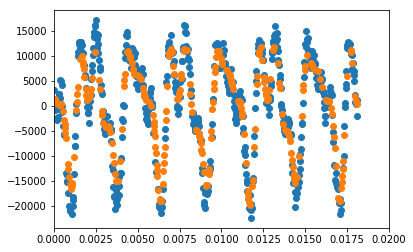

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
regr = Lasso(alpha = 500)
regr.fit(Xtr,ytr)
yhat = regr.predict(Xts)
rscore = r2_score(yhat,yts)
print(rscore)
plt.scatter(ttr,ytr)
plt.scatter(tts,yhat)
plt.xlim(0,0.02)
plt.show()

<StemContainer object of 3 artists>

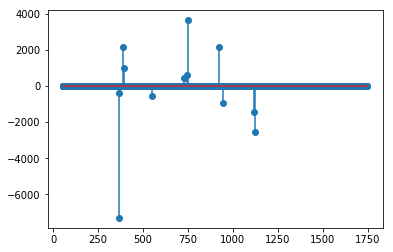

In [43]:
w = regr.coef_
a = w[:len(w)//2]
b = w[len(w)//2:]
plt.stem(freq,a)
plt.stem(freq,b)